In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Poisson

## Football

Number of goals per football match is a Poisson random variable with lambda = 2.5. What is the probability that no goals are scored?

In [2]:
np.exp(-2.5)

0.0820849986238988

In [3]:
stats.poisson(2.5).pmf(0)

0.0820849986238988

## Vehicle

An observer counts 240 vehicles per hour at a specific vehicle arrival location on a highway. Assume that the arrivals are Poisson distributed. What is the probability of one vehicle arriving over a 30 second time interval?



In [4]:
# P[N=1] formula
2 * np.exp(-2)

0.2706705664732254

In [5]:
stats.poisson(2).pmf(1)

0.2706705664732254

# Exponential

## Bus

Time spent waiting for a bus is exponentially distributed with mean 10 minutes.
What is the probability of waiting more than 15 minutes.
Given that we have waited for ten minutes, what is the probability of waiting more than 15 minutes.

In [6]:
# P[X > 15]
1 - stats.expon(scale=10).cdf(15)

0.2231301601484298

In [7]:
# P[X > 15 | X > 10] = P[X > 5]
1 - stats.expon(scale=10).cdf(5)

0.6065306597126334

## Railway

For a certain railway agency, the number of days people book their rail ticket in advance can be modeled by an exponential distribution, with the average amount of time to be 4 days. Based on this data, how many days in advance do 75% of all travelers book tickets?

In [8]:
stats.expon(scale=4).ppf(0.75)

5.545177444479562

## Football

Number of goals per football match of 90 minutes is a Poisson random variable with lambda = 2.5. 
What is the expected number of minutes to wait for the first goal?
What is the probability that there is no goal scored till half-time (45 mins)

In [9]:
# Here 90 mins is "one interval", hence lambda = 2.5, and use Exponential to find prob of waiting > "half" interval
1 - stats.expon(scale=1/2.5).cdf(1/2)

0.28650479686019015

In [10]:
# Here 45-mins is "one interval", hence lambda = 2.5/2, and use Exponential to find prob of waiting > "one" interval
1 - stats.expon(scale=1/1.25).cdf(1)

0.28650479686019015

In [11]:
# Here 45 mins is "one interval", hence lambda = 2.5/2, and use Poisson to count that "0" goals are scored
stats.poisson(1.25).pmf(0)

0.2865047968601901

# Coin toss till first heads

## Recursion

In [12]:
p = 0.7
def expected_coin_tosses():
    toss = np.random.choice(["Heads", "Tails"], p=[p, 1-p])
    if toss == "Heads":
        return 1
    else:
        return 1 + expected_coin_tosses()

In [13]:
num_trials = 10000
list_of_expected_tosses = []
for trial in range(num_trials):
    val = expected_coin_tosses()
    list_of_expected_tosses.append(val)
print(np.mean(list_of_expected_tosses))

1.4238


In [14]:
1/p

1.4285714285714286

<AxesSubplot:ylabel='Count'>

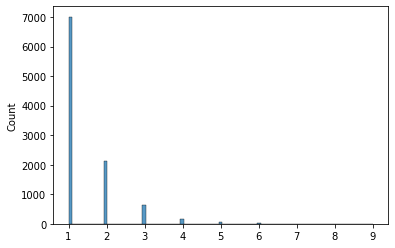

In [15]:
sns.histplot(list_of_expected_tosses)

## Iteration

1.4332


<AxesSubplot:ylabel='Probability'>

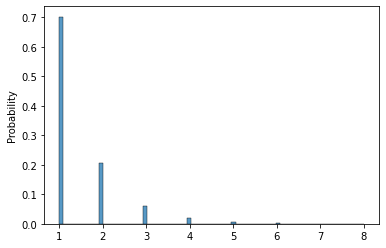

In [16]:
p = 0.7
num_trials = 10000
flips_till_first_heads = []
for trial in range(num_trials):
    val = 1
    while True:
        toss = np.random.choice(["Heads", "Tails"], p=[p, 1-p])
        if toss == "Heads":
            break
        else:
            val += 1
    flips_till_first_heads.append(val)
    
print(np.mean(flips_till_first_heads))
sns.histplot(flips_till_first_heads, stat="probability")